## Import necesarry Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

## Data Preprocessing

In [2]:
# Load the dataset 
data = pd.read_csv('liver_cirrhosis.csv')
print(data.head())

   N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1   

In [3]:
# Check for missing values
print(data.isnull().sum())

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [4]:
# Define categorical columns to encode
label_enc_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status', 'Drug']

# Apply Label Encoding
le = LabelEncoder()
for col in label_enc_cols:
    data[col] = le.fit_transform(data[col])

print(data.head())

   N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0    2221       0     1  18499    0        0             1        0      0   
1    1230       0     1  19724    1        1             0        1      0   
2    4184       0     1  11839    0        0             0        0      0   
3    2090       2     1  16467    0        0             0        0      0   
4    2105       2     1  21699    0        0             1        0      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0         

In [5]:
# Feature scaling
numeric_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

## Exploratory Data Analysis

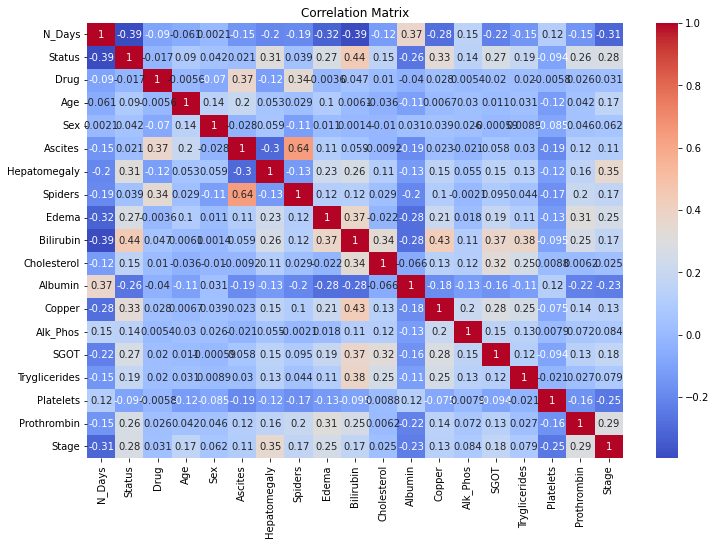

In [6]:
#Visualize correlations to understand feature relationships

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

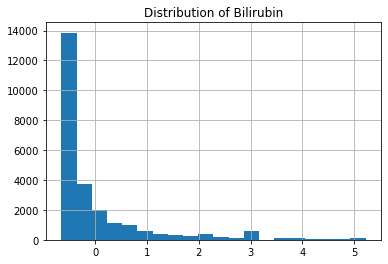

In [7]:
#Check the distribution of key features

data['Bilirubin'].hist(bins=20)
plt.title('Distribution of Bilirubin')
plt.show()

## Feature Engineering

In [8]:
# Recursive Feature Elimination (RFE) 

X = data.drop('Stage', axis=1)
y = data['Stage']

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Selected features
print('Selected Features:', X.columns[fit.support_])

Selected Features: Index(['N_Days', 'Age', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Albumin', 'Alk_Phos', 'Platelets', 'Prothrombin'],
      dtype='object')


## Model Selection and training

In [9]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Logistic regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.61      0.60      1657
           2       0.55      0.51      0.53      1697
           3       0.67      0.69      0.68      1646

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



In [11]:
# Randon Forest 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95      1657
           2       0.94      0.96      0.95      1697
           3       0.96      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



In [16]:
# XGBoost model

# Adjust target labels to start from 0 instead of 1
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Initialize and train the XGBoost model
xgb = XGBClassifier(objective='multi:softmax', num_class=3)
xgb.fit(X_train, y_train_adj)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the performance (adjust predictions back to original labels)
y_pred_xgb_adj = y_pred_xgb + 1

# Print classification report for the original labels
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_adj))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      1657
           2       0.94      0.97      0.95      1697
           3       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



In [21]:
# Save the trained model using pickle
import pickle
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

## Model Evaluation

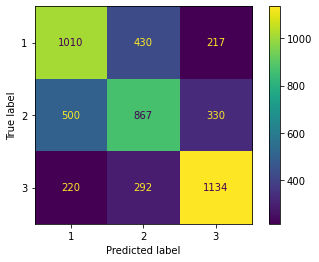

In [18]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3]).plot()
plt.show()

In [19]:
# Cross validation and hyperparameter tuning 

from sklearn.model_selection import cross_val_score, GridSearchCV

# Example with Random Forest and GridSearch
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Params:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

Best Params: {'max_depth': None, 'n_estimators': 200}
Best Accuracy: 0.9531500000000002


## Prediction

In [22]:
# Example: Showing one prediction from the test set
example_input = X_test.iloc[0].values.reshape(1, -1)  # Single test instance
example_prediction = xgb.predict(example_input) + 1  # Adjust prediction back to original label
print(f"Predicted Stage for the example input: {example_prediction[0]}")

Predicted Stage for the example input: 1
